## Capstone Project: MuscleHub AB Testing

### Initial Setup 

Import required tools. 

In [84]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency

### Import and Organize Data

Data tables available to work with:

- `visits` contains information about gym customers who have visited MuscleHub

- `fitness_tests` contains information about clients in Group A who were given a fitness test

- `applications` contains information about any potential customer who filled out an application

- `purchases` contains information about customers who have purchased a membership

In [36]:
visits = pd.read_csv("visits.csv")
print(visits.head())
print(len(visits))

  first_name last_name                          email  gender visit_date
0      Karen   Manning        Karen.Manning@gmail.com  female     5-1-17
1    Annette     Boone               AB9982@gmail.com  female     5-1-17
2   Salvador   Merritt  SalvadorMerritt12@outlook.com    male     5-1-17
3     Martha   Maxwell       Martha.Maxwell@gmail.com  female     5-1-17
4      Andre     Mayer         AndreMayer90@gmail.com    male     5-1-17
6000


In [37]:
fitness_tests = pd.read_csv("fitness_tests.csv")
print(fitness_tests.head())
print(len(fitness_tests))

  first_name last_name                   email  gender fitness_test_date
0        Kim    Walter   KimWalter58@gmail.com  female        2017-07-03
1        Tom   Webster        TW3857@gmail.com    male        2017-07-02
2     Marcus     Bauer  Marcus.Bauer@gmail.com    male        2017-07-01
3    Roberta      Best      RB6305@hotmail.com  female        2017-07-02
4     Carrie   Francis      CF1896@hotmail.com  female        2017-07-05
2500


In [38]:
applications = pd.read_csv("applications.csv")
print(applications.head())
print(len(applications))

  first_name last_name                    email  gender application_date
0        Roy    Abbott    RoyAbbott32@gmail.com    male       2017-08-12
1      Agnes   Acevedo  AgnesAcevedo1@gmail.com  female       2017-09-29
2    Roberta   Acevedo         RA8063@gmail.com  female       2017-09-15
3     Darren    Acosta  DAcosta1996@hotmail.com    male       2017-07-26
4     Vernon    Acosta    VAcosta1975@gmail.com    male       2017-07-14
575


In [39]:
purchases = pd.read_csv("purchases.csv")
print(purchases.head())
print(len(purchases))

  first_name last_name                    email  gender purchase_date
0        Roy    Abbott    RoyAbbott32@gmail.com    male    2017-08-18
1    Roberta   Acevedo         RA8063@gmail.com  female    2017-09-16
2     Vernon    Acosta    VAcosta1975@gmail.com    male    2017-07-20
3     Darren    Acosta  DAcosta1996@hotmail.com    male    2017-07-27
4       Dawn    Adkins    Dawn.Adkins@gmail.com  female    2017-08-24
450


Combining the data frames where `visit_data` is on or after `7-1-17` through a series of left joins. 

First, limit `visits` to the correct date range. Then merge the dataframes. 

In [47]:
start_date = '7-01-17'
mask = (visits['visit_date'] > start_date)
visits = visits.loc[mask]
print(visits.head())
print(len(visits))

     first_name last_name                   email  gender visit_date
1000        Kim    Walter   KimWalter58@gmail.com  female     7-1-17
1001        Tom   Webster        TW3857@gmail.com    male     7-1-17
1002     Edward     Bowen  Edward.Bowen@gmail.com    male     7-1-17
1003     Marcus     Bauer  Marcus.Bauer@gmail.com    male     7-1-17
1004    Roberta      Best      RB6305@hotmail.com  female     7-1-17
5000


In [52]:
df = pd.merge(visits, fitness_tests, how='left')
df = pd.merge(df, applications, how='left')
df = pd.merge(df, purchases, how='left')
print(df.head())
print(len(df))

  first_name last_name                   email  gender visit_date  \
0        Kim    Walter   KimWalter58@gmail.com  female     7-1-17   
1        Tom   Webster        TW3857@gmail.com    male     7-1-17   
2     Edward     Bowen  Edward.Bowen@gmail.com    male     7-1-17   
3     Marcus     Bauer  Marcus.Bauer@gmail.com    male     7-1-17   
4    Roberta      Best      RB6305@hotmail.com  female     7-1-17   

  fitness_test_date application_date purchase_date  
0        2017-07-03              NaN           NaN  
1        2017-07-02              NaN           NaN  
2               NaN       2017-07-04    2017-07-04  
3        2017-07-01       2017-07-03    2017-07-05  
4        2017-07-02              NaN           NaN  
5004


### A/B Groups

`ab_test_group` is defined as `A` if a fitness test was conducted and `B` if it was not. 

In [55]:
df['ab_test_group'] = df.fitness_test_date.apply(lambda x:'A' if pd.notnull(x) else 'B')
print(df.head())

  first_name last_name                   email  gender visit_date  \
0        Kim    Walter   KimWalter58@gmail.com  female     7-1-17   
1        Tom   Webster        TW3857@gmail.com    male     7-1-17   
2     Edward     Bowen  Edward.Bowen@gmail.com    male     7-1-17   
3     Marcus     Bauer  Marcus.Bauer@gmail.com    male     7-1-17   
4    Roberta      Best      RB6305@hotmail.com  female     7-1-17   

  fitness_test_date application_date purchase_date ab_test_group  
0        2017-07-03              NaN           NaN             A  
1        2017-07-02              NaN           NaN             A  
2               NaN       2017-07-04    2017-07-04             B  
3        2017-07-01       2017-07-03    2017-07-05             A  
4        2017-07-02              NaN           NaN             A  


Next, we will count how many participants were in each group. 

In [63]:
ab_counts = df.groupby("ab_test_group").first_name.count().reset_index()
groups = ['Group A', 'Group B']
print(ab_counts)

  ab_test_group  first_name
0             A        2504
1             B        2500


Then, convert this data into a pie chart, showing what percentage of participants were in each group. 

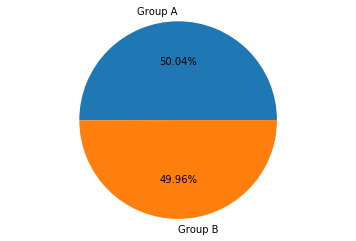

In [65]:
plt.pie(ab_counts.first_name.values, labels = groups, autopct = '%0.2f%%')
plt.axis('equal')
plt.show()
plt.savefig('ab_test_pie_chart.png')

### Who Applies to the Gym

The signup process for MuscleHub has many steps. First, clients must take a fitness test (if in Group A). Then, they must fill out an application. Finally, they must pay for the first month. 

Here, we will determine how many make it to step 2, filling out an application. 

In [75]:
df['is_application'] = df.application_date.apply(lambda x:'Application' if pd.notnull(x) else 'No Application')
print(df.head())

  first_name last_name                   email  gender visit_date  \
0        Kim    Walter   KimWalter58@gmail.com  female     7-1-17   
1        Tom   Webster        TW3857@gmail.com    male     7-1-17   
2     Edward     Bowen  Edward.Bowen@gmail.com    male     7-1-17   
3     Marcus     Bauer  Marcus.Bauer@gmail.com    male     7-1-17   
4    Roberta      Best      RB6305@hotmail.com  female     7-1-17   

  fitness_test_date application_date purchase_date ab_test_group  \
0        2017-07-03              NaN           NaN             A   
1        2017-07-02              NaN           NaN             A   
2               NaN       2017-07-04    2017-07-04             B   
3        2017-07-01       2017-07-03    2017-07-05             A   
4        2017-07-02              NaN           NaN             A   

   is_application  
0  No Application  
1  No Application  
2     Application  
3     Application  
4  No Application  


How many people from group A and group B pick up an application?

In [79]:
app_counts = df.groupby(["ab_test_group", 'is_application']).first_name.count().reset_index()
print(app_counts)

  ab_test_group  is_application  first_name
0             A     Application         250
1             A  No Application        2254
2             B     Application         325
3             B  No Application        2175


In [80]:
counts_pivot = app_counts.pivot(columns = "is_application",
                index = 'ab_test_group',
                values = 'first_name').reset_index()
print(counts_pivot)

is_application ab_test_group  Application  No Application
0                          A          250            2254
1                          B          325            2175


In [81]:
counts_pivot['total'] = counts_pivot.Application + counts_pivot['No Application']
print(counts_pivot)

is_application ab_test_group  Application  No Application  total
0                          A          250            2254   2504
1                          B          325            2175   2500


With the number that applied and the totals, we can now calculate the percent of clients who progress to the application for each experimental group. 

In [82]:
counts_pivot['Percent with Application'] = 100 * (counts_pivot.Application / counts_pivot.total)
print(counts_pivot)

is_application ab_test_group  Application  No Application  total  \
0                          A          250            2254   2504   
1                          B          325            2175   2500   

is_application  Percent with Application  
0                               9.984026  
1                              13.000000  


So, more clients from group B (no fitness test) turned in an application. 

### Is this difference significant?

Because we have categorical data and are comparing two possible outcomes in a contingency table, we will use a Chi Square test for this analysis. 


In [85]:
contingency = [[250, 2254],
              [325, 2175]]
chi2, pval, dof, expected = chi2_contingency(contingency)
print(pval)

0.0009647827600722304


Our P value was 0.009, far less than 0.05. This means the null hypothesis *(no difference between the two groups)* is rejected. 

### Who Purchases a Membership?

Now we are interested in of those who filled out an application, how many actually purchased a membership?

First, add a row to determine whether someone is a member (has paid) or not. 

In [88]:
df['is_member'] = df.purchase_date.apply(lambda x: 'Member' if pd.notnull(x) else 'None')
print(df.head())

  first_name last_name                   email  gender visit_date  \
0        Kim    Walter   KimWalter58@gmail.com  female     7-1-17   
1        Tom   Webster        TW3857@gmail.com    male     7-1-17   
2     Edward     Bowen  Edward.Bowen@gmail.com    male     7-1-17   
3     Marcus     Bauer  Marcus.Bauer@gmail.com    male     7-1-17   
4    Roberta      Best      RB6305@hotmail.com  female     7-1-17   

  fitness_test_date application_date purchase_date ab_test_group  \
0        2017-07-03              NaN           NaN             A   
1        2017-07-02              NaN           NaN             A   
2               NaN       2017-07-04    2017-07-04             B   
3        2017-07-01       2017-07-03    2017-07-05             A   
4        2017-07-02              NaN           NaN             A   

   is_application is_member  
0  No Application      None  
1  No Application      None  
2     Application    Member  
3     Application    Member  
4  No Application      Non

Now, isolate the rows for clients who picked up an application. 

In [95]:
just_apps = df[df.is_application == "Application"]
print(just_apps.head())

   first_name last_name                    email  gender visit_date  \
2      Edward     Bowen   Edward.Bowen@gmail.com    male     7-1-17   
3      Marcus     Bauer   Marcus.Bauer@gmail.com    male     7-1-17   
9    Salvador  Cardenas  SCardenas1980@gmail.com    male     7-1-17   
11    Valerie     Munoz     VMunoz1998@gmail.com  female     7-1-17   
35    Michael     Burks         MB9820@gmail.com    male     7-1-17   

   fitness_test_date application_date purchase_date ab_test_group  \
2                NaN       2017-07-04    2017-07-04             B   
3         2017-07-01       2017-07-03    2017-07-05             A   
9         2017-07-07       2017-07-06           NaN             A   
11        2017-07-03       2017-07-05    2017-07-06             A   
35               NaN       2017-07-07    2017-07-13             B   

   is_application is_member  
2     Application    Member  
3     Application    Member  
9     Application      None  
11    Application    Member  
35    Ap

Then, we can perform a count for how many members there are for each experimental group. 

In [116]:
member = just_apps.groupby(["is_member", 'ab_test_group']).first_name.count().reset_index()
member_pivot = member.pivot(columns = 'is_member',
                           index = "ab_test_group",
                           values = 'first_name').reset_index()
member_pivot['Total'] = member_pivot.Member + member_pivot['None']
member_pivot["Percent Purchase"] = 100 * (member_pivot.Member / member_pivot.Total)
print(member_pivot)

is_member ab_test_group  Member  None  Total  Percent Purchase
0                     A     200    50    250         80.000000
1                     B     250    75    325         76.923077


For both groups, it looks like if an application was picked up, there was a relatively equal change for them to become a paying member. 

### Is this difference significant?

In [118]:
contingency2 = [[200, 50],
               [250, 75]]

In [119]:
chi2, pval2, dof, expected = chi2_contingency(contingency2)
print(pval2)

0.43258646051083327


Thus, our p value is 0.432. This is much higher than 0.05, meaning that there is no statistically significant difference between these two groups after an application has been filled out. 


Therefore, we know that the **main point of transition is filling out an application**. 

### Looking at All Visitors

What percentage of **all visitors** finally became members?

In [128]:
final_member_count = df.groupby(['ab_test_group', 'is_member'])\
                 .first_name.count().reset_index()
final_member_pivot = final_member_count.pivot(columns='is_member',
                                  index='ab_test_group',
                                  values='first_name')\
                           .reset_index()



In [132]:
final_member_pivot['Total'] = final_member_pivot.Member + final_member_pivot['None']
final_member_pivot['Percent Purchase'] = final_member_pivot.Member / final_member_pivot.Total

print(final_member_pivot)

is_member ab_test_group  Member  None  Total  Percent Purchase
0                     A     200  2304   2504          0.079872
1                     B     250  2250   2500          0.100000


There was **no significance** once someone had already picked up an application. 

Now lets consider if there is any significance across **everyone who visits** MuscleHub.

In [133]:
contingency3 = [[200, 2304],
               [250, 2250]]
chi2, pval3, dof, expected = chi2_contingency(contingency3)
print(pval3)

0.014724114645783203


Our P value is 0.014 which is less than 0.05. Therefore, there is **no overall significance** across all clients who visit MuscleHub. 

### Final Funnel and Results

These bar charts show the acquisition process across 3 checkpoints, as calculated above:
- percent of visitors who fill out an application
- percent of applicants who purchase a membership
- percent of all visitors who purchase a membership

These demonstrate the percentages from **each** set: `counts_pivot`, `member_pivot`, and `final_member_pivot`. 

Each also demonstrates whether clients were in Group A or Group B. 

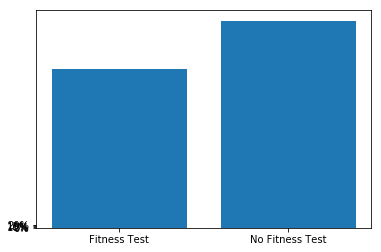

In [135]:
# Percent of Visitors who Apply
ax = plt.subplot()
plt.bar(range(len(counts_pivot)),
       counts_pivot['Percent with Application'].values)
ax.set_xticks(range(len(counts_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.show()
plt.savefig('percent_visitors_apply.png')

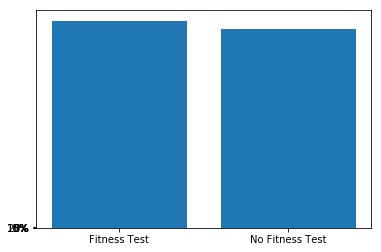

In [140]:
# Percent of Applicants who Purchase
ax = plt.subplot()
plt.bar(range(len(member_pivot)),
       member_pivot['Percent Purchase'].values)
ax.set_xticks(range(len(counts_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.show()
plt.savefig('percent_apply_purchase.png')

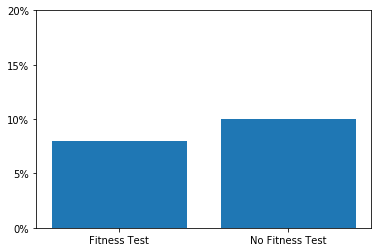

In [139]:
# Percent of Visitors who Purchase
ax = plt.subplot()
plt.bar(range(len(final_member_pivot)),
       final_member_pivot['Percent Purchase'].values)
ax.set_xticks(range(len(counts_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.show()
plt.savefig('percent_visitors_purchase.png')